# Data Exploration

### Notebook Overview
* [Imports](#chapter0)
* [Image Analysis](#chapter1)
    * [Plotting an Example](#section_1_1)
    * [Overall Analysis](#section_1_2)

* [Video Analysis](#chapter2)
    * [Abschnitt 2.1](#section_2_1)
        * [Unterabschnitt 2.1.1](#sub_section_2_1_1)
        * [Unterabschnitt 2.1.2](#sub_section_2_1_2)


## Imports <a class="anchor" id="chapter0"></a>

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations and Image Processing
from glob import glob 
import cv2 
import matplotlib.pylab as plt 
import plotly.express as px

# Sonstige
import random


## Image Analysis <a class="anchor" id="chapter1"></a>


### Plotting an Example <a id="section_1_1"></a>


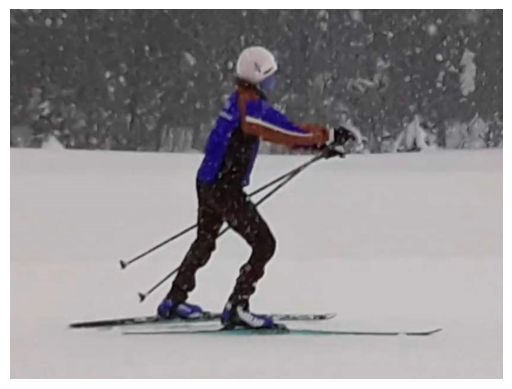

In [2]:
path_to_images = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/pictures/lateral/"
skier_images = glob(path_to_images + "*.jpg")

# plot a random lateral image 
example_image = cv2.imread(skier_images[random.randint(0,len(skier_images)-1)])

fig, ax = plt.subplots()
ax.imshow(example_image)
ax.axis("off")
plt.show()

### Overall Analysis <a id="section_1_2"></a>

In [3]:
shapes = []
resolutions = []
color_distributions = []


for image in skier_images:
    current_image = cv2.imread(image)

    # Extract shape of image
    shape = current_image.shape
    shapes.append(shape)

    # Extract the resolution of the image
    resolution = current_image.shape[:2]
    resolutions.append(resolution)

    # Extract colordistribution
    color_distribution = np.bincount(current_image.flatten(), minlength=256)
    color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)
    


In [7]:
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=600,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.show()

## Video Analysis <a class="anchor" id="chapter2"></a>